In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(0)

In [5]:
from sklearn.datasets import make_blobs

In [6]:
#below function make_blob is a synthetic data generator
X, y_orignal = make_blobs(1000, n_features=2, centers=4, random_state=0)

In [7]:
print("Data shape:", X.shape, y_orignal.shape)
print("Class labels:", np.unique(y_orignal))

Data shape: (1000, 2) (1000,)
Class labels: [0 1 2 3]


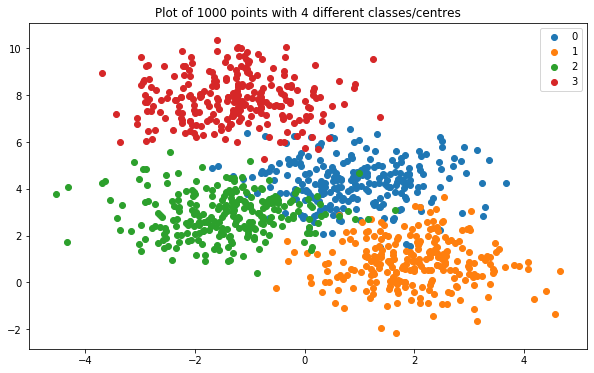

In [8]:
#plotting the generated data coloured by their class labels(4 classes)
plt.figure(figsize=(10,6))

for cls in np.unique(y_orignal):
    plt.scatter(X[y_orignal==cls,0], X[y_orignal==cls,1], label=cls)
plt.title("Plot of "+str(X.shape[0])+" points with 4 different classes/centres")
plt.legend()
plt.show()

In [15]:
y = np.mod(y_orignal,2)

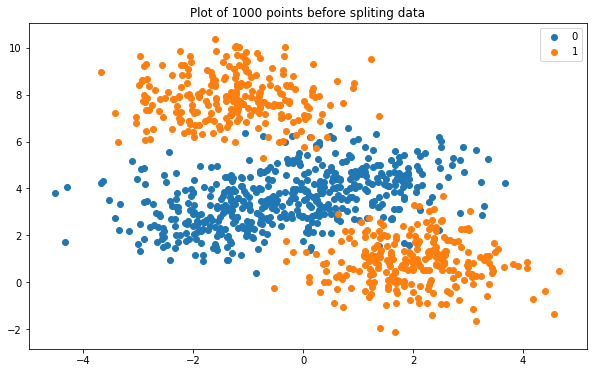

In [16]:
#plotting the generated data coloured by their class labels(2 classes)
plt.figure(figsize=(10,6))

for cls in np.unique(y):
    plt.scatter(X[y==cls,0], X[y==cls,1], label=cls)
plt.title("Plot of "+str(X.shape[0])+" points before spliting data")
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

In [79]:
a = np.arange(4).reshape(2,2)
b = np.array([3,3]).reshape(2,1)

print(a, "\n\n",b)
print(a.shape, b.shape)

b*a

[[0 1]
 [2 3]] 

 [[3]
 [3]]
(2, 2) (2, 1)


array([[0, 3],
       [6, 9]])

In [199]:
#implementing a class for 2 layer neural network for binary classification problem
#m0=2 input neurons, m1=2 neurons in hidden layer, m2=1 neuron in output layer

#sigmoid neuron as a class

class FFNetwork:
    
    def __init__(self, layers=[2,2,1]):
        
        self.m0, self.m1, self.m2 = layers
        
        self.W1 = np.random.randn(self.m1, self.m0)
        self.B1 = np.random.randn(self.m1).reshape(-1, 1)
        
        self.W2 = np.random.randn(self.m2, self.m1)
        self.B2 = np.random.randn(self.m2).reshape(-1, 1)
        
    def inference(self, X, W, B):
        z = np.dot(X, W.T) + B.T
        return z.astype(np.float128)
    
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-z))
    
    def loss(self, Y, Y_cap, loss='mse'):
        loss = (0.5*mean_squared_error(Y, Y_cap)) if (loss=='mse') else log_loss(Y, Y_cap)
        return loss
    
    def forward_pass(self, X):
        
        self.A1 = self.inference(X, self.W1, self.B1)
        self.H1 = self.sigmoid(self.A1)
        
        self.A2 = self.inference(self.H1, self.W2, self.B2)
        self.H2 = self.sigmoid(self.A2)
        
        return self.H2
    
    def grad(self, X, Y):
        
        Y = Y.reshape(-1,1) if (Y.ndim==1) else Y
        
        Y_cap = self.forward_pass(X)
     
        self.dA2 = (((Y_cap - Y) * Y_cap * (1 - Y_cap)))
        self.dW2 = self.dA2.T.dot(self.H1)
        self.dB2 = self.dA2.sum(axis=0).reshape(-1, 1)
        
        self.dA1 = self.dA2 * (self.W2) * self.H1 * (1 - self.H1)
        self.dW1 = (self.dA1).sum(axis=0).reshape(-1, 1) * self.W1
        self.dB1 = (self.dA1).sum(axis=0).reshape(-1, 1)

        return Y_cap
        
    def plot_contour(self, X, Y):
        
        min_vals = [a-1 if a<0 else a+1 for a in X.min(axis=0)]
        max_vals = [a+1 if a>0 else a-1 for a in X.max(axis=0)]
        
        X1 = np.linspace(min_vals[0], max_vals[0], 100)
        X2 = np.linspace(min_vals[1], max_vals[1], 100)
        
        m = X1.shape[0]
        n = X2.shape[0]
        
        X1n, X2m = np.meshgrid(X1, X2)
        Y_mesh = np.zeros((n,m))
        
        for i in range(n):
            for j in range(m):
                Y_mesh[i, j] = self.predict(np.array([X1n[i, j], X2m[i, j]]))[0]
        
        plt.figure(figsize=(8,6))
        plt.grid(True)
        plt.title("Learned decision boundary")
        plt.contourf(X1n, X2m, Y_mesh, alpha=0.3)
        plt.scatter(X[:,0], X[:,1], c=Y.ravel())
        plt.show()
           
    def fit(self, X, Y, epochs=1, lr=1.0, loss='mse', rand_init=True):
        
        Y = Y.reshape(-1,1) if (Y.ndim==1) else Y

        mse_list = []
        min_batch_size = X.shape[0]
        
        for e in range(epochs):
            
            Y_cap = self.grad(X, Y)
            
            mse = self.loss(Y, Y_cap, loss)
            mse_list.append(mse)
            
            self.W2 = self.W2 - lr*(self.dW2/min_batch_size)
            self.B2 = self.B2 - lr*(self.dB2/min_batch_size)
            
            self.W1 = self.W1 - lr*(self.dW1/min_batch_size)
            self.B1 = self.B1 - lr*(self.dB1/min_batch_size)

        self.plot_contour(X, Y)
        return mse_list
    
    def predict(self, X, thresh=0.5):
        Y_pred = self.forward_pass(X)
        return (Y_pred > thresh).astype(int).ravel()  
    

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [40]:
print(X_train.shape, X_test.shape)

(750, 2) (250, 2)


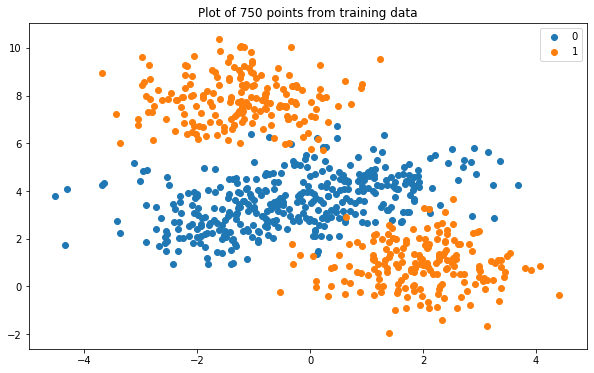

In [41]:
#plotting the train split data coloured by their class labels(2 classes)
plt.figure(figsize=(10,6))

for cls in np.unique(y_train):
    plt.scatter(X_train[y_train==cls,0], X_train[y_train==cls,1], label=cls)
plt.title("Plot of "+str(X_train.shape[0])+" points from training data")
plt.legend()
plt.show()

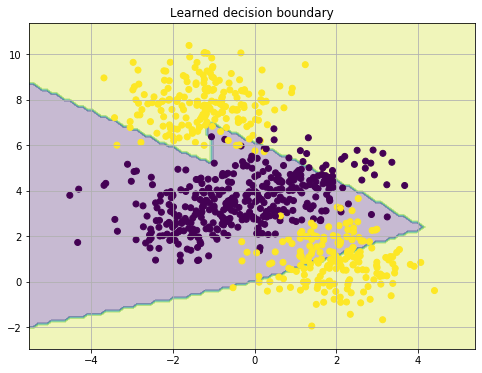

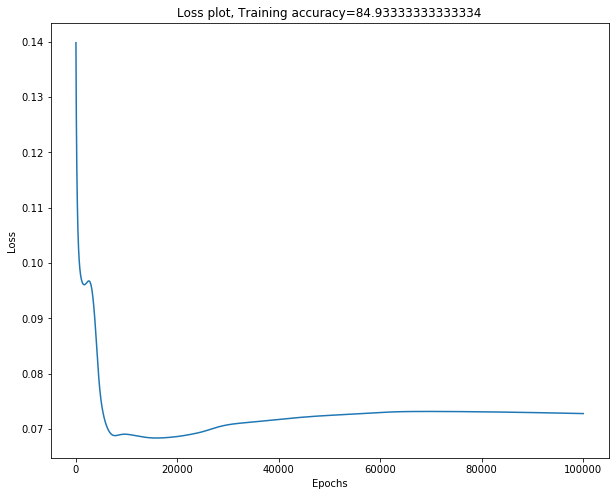

In [200]:
#layers = [2,8,1], loss_fn = 'mse', epochs = 100000, lr = 0.1

loss_fn = 'mse'
epochs = 100000
lr = 0.1

ffn = FFNetwork([2,6,1])

loss_list = ffn.fit(X_train, y_train, epochs=epochs, loss=loss_fn, lr=lr)
y_train_pred = ffn.predict(X_train)

train_accu = str(accuracy_score(y_train, y_train_pred)*100)

plt.figure(figsize=(10,8))
plt.plot(loss_list)
plt.title("Loss plot, Training accuracy="+train_accu)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Test accuracy: 0.644


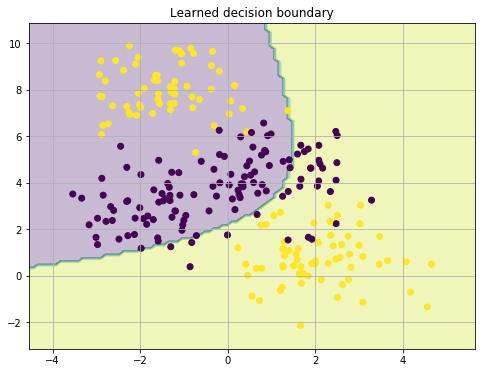

In [179]:
y_test_pred = ffn.predict(X_test)
test_accu = accuracy_score(y_train, y_train_pred)

print("Test accuracy:", test_accu)
ffn.plot_contour(X_test, y_test)

In [212]:
np.random.seed(0)
np.random.randn(2,3)

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [3]:
!nvidia-smi

Thu Feb  6 11:23:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 430.50       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Quadro P1000        Off  | 00000000:65:00.0 Off |                  N/A |
| 34%   31C    P8    N/A /  N/A |     18MiB /  4038MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [226]:
torch.cuda.empty_cache()